In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_path_covid = r"C:\Users\Konrad Grudzinski\OneDrive - University of Glasgow\Computing\4th Year\Individual Project\Source\covid19"

In [3]:
with open(base_path_covid + "\samples.json", "r") as f:
    samples = json.load(f)

In [5]:
with open(base_path_covid + "\sorted_samples.json", "r") as f:
    sorted_samples = json.load(f)

In [6]:
sample_ids = sorted_samples["United Kingdom"]["months"]["2021-6"]["samples"]

In [7]:
dates = [samples[s_id]["collection_date"] for s_id in sample_ids]

In [27]:
days = list(map(lambda x:int(x.split("-")[-1]), dates))

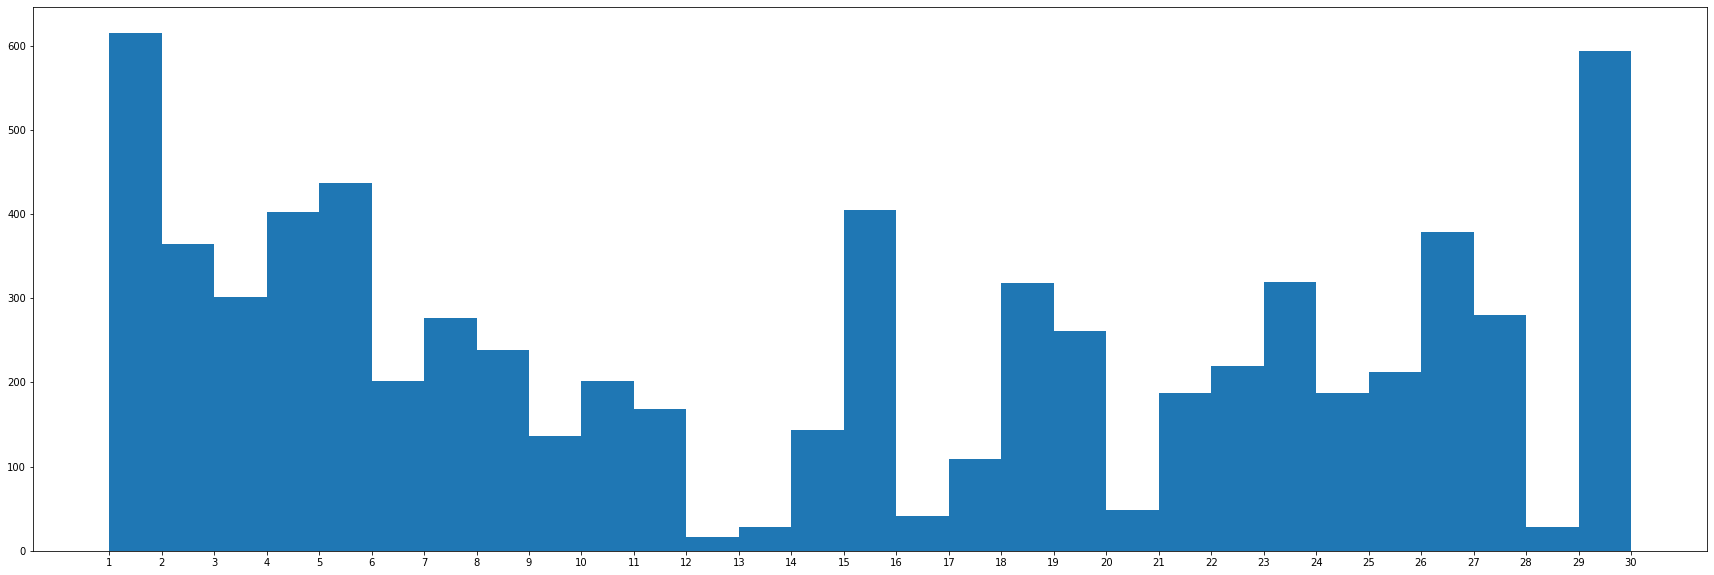

In [48]:
fig, ax = plt.subplots(figsize=(30,10))
ax.set_xticks(np.arange(1,31))
x = ax.hist(days, bins=29)

In [49]:
x

(array([615., 364., 302., 402., 437., 202., 277., 239., 136., 202., 169.,
         16.,  28., 143., 405.,  41., 109., 318., 261.,  48., 187., 219.,
        319., 187., 212., 379., 280.,  28., 594.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30.]),
 <BarContainer object of 29 artists>)

In [60]:
np.sum(x[0][:len(counts)//4])/np.sum(counts)

0.36507936507936506

In [73]:
def plot_and_print_histogram(country, date):
    sample_ids = sorted_samples[country]["months"][date]["samples"]
    dates = [samples[s_id]["collection_date"] for s_id in sample_ids]
    days = list(map(lambda x:int(x.split("-")[-1]), dates))
    fig, ax = plt.subplots(figsize=(30,10))
    ax.set_xticks(np.arange(min(days),max(days) + 1))
    x = ax.hist(days, bins=max(days)-1)
    counts = x[0]
    print([np.sum(counts[:int(len(counts)*p)])/np.sum(counts) - p for p in [0.25, 0.5, 0.75]])

[-0.03742857142857142, 0.03417142857142852, 0.05651428571428574]


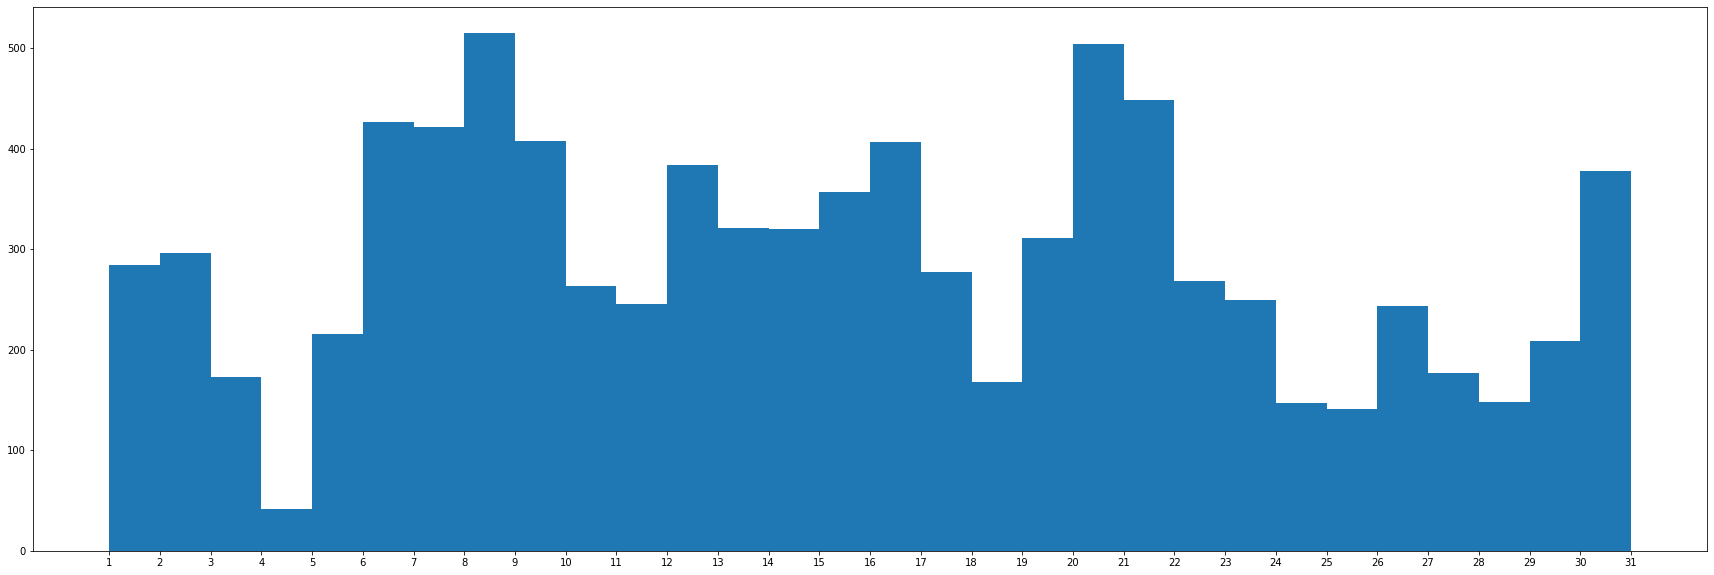

In [74]:
plot_and_print_histogram("USA", "2021-7")

[0.11507936507936506, -0.003862902092990561, -0.06156061244556821]


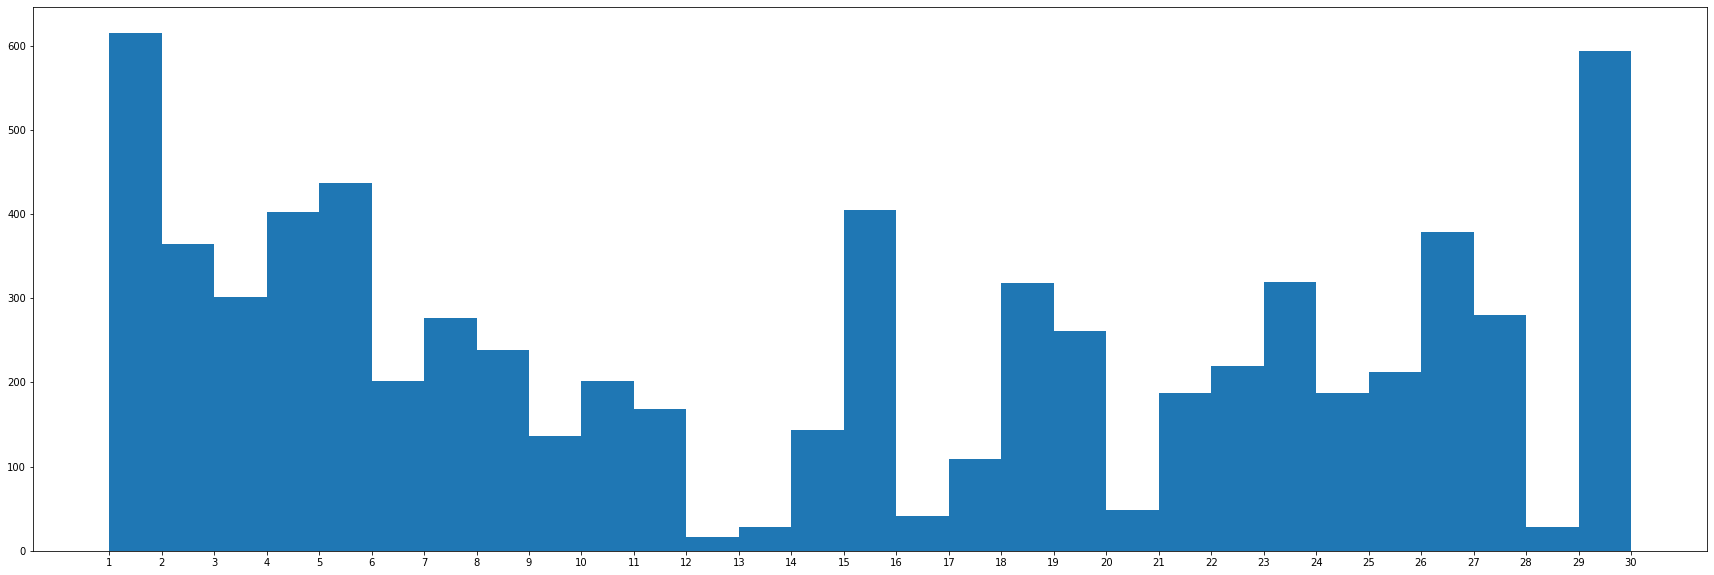

In [75]:
plot_and_print_histogram("United Kingdom", "2021-6")